<a href="https://colab.research.google.com/github/grjadhav409/MCF7-inhibitors-prediction-using-ML/blob/main/1_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries 

In [ ]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

# importing data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug discovery/MCF7/data/MCF7_data.csv" , sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = pd.DataFrame(data = data)

In [ ]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL1672983,NaN,0,549.55,2,4.18,2,COc1ccc(Cn2c3nc(-c4ccc([N+](=O)[O-])cc4)nc4c(n...,IC50,'=',5700.0,nM,5.24,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1679262,Cytotoxicity against human MCF7 cells after 72...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL1671849,1,Scientific Literature,ACS Med. Chem. Lett.,2011.0,CHEMBL3308403,NaN
1,CHEMBL1672986,NaN,0,416.42,0,2.73,12,COc1ccc(Cn2cnc3c4nc(=O)n(Cc5ccc(F)cc5)c-4ncnc3...,IC50,'=',4000.0,nM,5.40,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1679262,Cytotoxicity against human MCF7 cells after 72...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL1671849,1,Scientific Literature,ACS Med. Chem. Lett.,2011.0,CHEMBL3308403,NaN
2,CHEMBL2385634,NaN,0,482.66,1,6.45,"9, Fokihodgin I",C=CC(=C)CC[C@@H]1[C@@]2(C)CCC[C@](C)(COC(=O)/C...,IC50,'=',15370.0,nM,4.81,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL2388325,Cytotoxicity against human MCF7 cells after 48...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL2384963,1,Scientific Literature,J. Nat. Prod.,2013.0,CHEMBL3308403,NaN
3,CHEMBL2402999,NaN,0,520.61,1,4.90,3f,COc1cc(-c2nc3sc4c(c3c(=O)n2C(Cc2ccccc2)C(=O)O)...,IC50,'=',50130.0,nM,4.30,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL2404134,Cytotoxicity against human MCF7 cells assessed...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL2401715,1,Scientific Literature,Eur. J. Med. Chem.,2013.0,CHEMBL3308403,NaN
4,CHEMBL109480,TANESPIMYCIN,3,585.7,1,2.54,"Tanespimycin, 17-AAG",C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,IC50,NaN,NaN,NaN,NaN,NaN,Not Determined,NaN,NaN,NaN,NaN,NaN,False,CHEMBL2379360,Cytotoxicity against human MCF7 cells after 48...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL2375340,1,Scientific Literature,J. Nat. Prod.,2013.0,CHEMBL3308403,NaN


## EDA

In [ ]:
df.describe()

,Molecule Max Phase,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Source ID,Document Year
count,43951.000000,4.250500e+04,30595.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43951.000000,43842.000000
mean,0.212168,2.279852e+05,5.492438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.023685,2013.585147
std,0.875953,9.427213e+06,1.150671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773161,5.153094
min,0.000000,0.000000e+00,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1987.000000
25%,0.000000,1.389000e+03,4.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2011.000000
50%,0.000000,1.000000e+04,5.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2014.000000
75%,0.000000,3.749000e+04,5.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2018.000000
max,4.000000,9.506048e+08,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43951 entries, 0 to 43950
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          43951 non-null  object 
 1   Molecule Name               5198 non-null   object 
 2   Molecule Max Phase          43951 non-null  int64  
 3   Molecular Weight            43951 non-null  object 
 4   #RO5 Violations             43951 non-null  object 
 5   AlogP                       43951 non-null  object 
 6   Compound Key                43951 non-null  object 
 7   Smiles                      43849 non-null  object 
 8   Standard Type               43951 non-null  object 
 9   Standard Relation           42504 non-null  object 
 10  Standard Value              42505 non-null  float64
 11  Standard Units              42582 non-null  object 
 12  pChEMBL Value               30595 non-null  float64
 13  Data Validity Comment       218

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


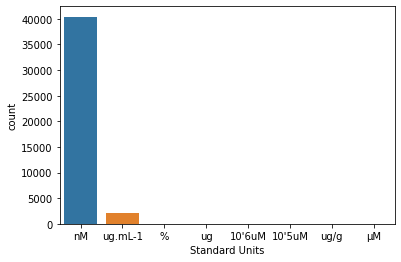

In [ ]:
sns.countplot(data['Standard Units'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


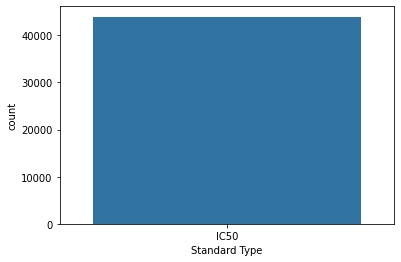

In [ ]:
sns.countplot(data['Standard Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


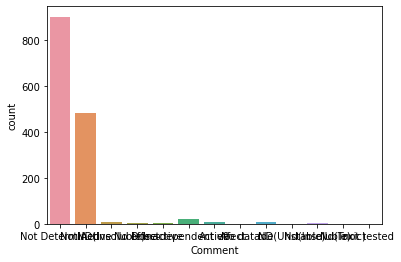

In [ ]:
sns.countplot(data['Comment'])
plt.show()

#data visualisation

In [ ]:
! pip install sweetviz

     |████████████████████████████████| 15.1 MB 12.9 MB/s 


In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=True)
import IPython
IPython.display.HTML('analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

TypeError: ignored

# **cleaning mising values**


In [ ]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [ ]:
len(df.Smiles.unique())

38838

In [ ]:
df_nr = df.drop_duplicates(['Smiles'])
df_nr

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL1672983,NaN,0,549.55,2,4.18,2,COc1ccc(Cn2c3nc(-c4ccc([N+](=O)[O-])cc4)nc4c(n...,IC50,'=',5700.00,nM,5.24,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1679262,Cytotoxicity against human MCF7 cells after 72...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL1671849,1,Scientific Literature,ACS Med. Chem. Lett.,2011.0,CHEMBL3308403,NaN
1,CHEMBL1672986,NaN,0,416.42,0,2.73,12,COc1ccc(Cn2cnc3c4nc(=O)n(Cc5ccc(F)cc5)c-4ncnc3...,IC50,'=',4000.00,nM,5.40,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL1679262,Cytotoxicity against human MCF7 cells after 72...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL1671849,1,Scientific Literature,ACS Med. Chem. Lett.,2011.0,CHEMBL3308403,NaN
2,CHEMBL2385634,NaN,0,482.66,1,6.45,"9, Fokihodgin I",C=CC(=C)CC[C@@H]1[C@@]2(C)CCC[C@](C)(COC(=O)/C...,IC50,'=',15370.00,nM,4.81,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL2388325,Cytotoxicity against human MCF7 cells after 48...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL2384963,1,Scientific Literature,J. Nat. Prod.,2013.0,CHEMBL3308403,NaN
3,CHEMBL2402999,NaN,0,520.61,1,4.90,3f,COc1cc(-c2nc3sc4c(c3c(=O)n2C(Cc2ccccc2)C(=O)O)...,IC50,'=',50130.00,nM,4.30,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL2404134,Cytotoxicity against human MCF7 cells assessed...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL2401715,1,Scientific Literature,Eur. J. Med. Chem.,2013.0,CHEMBL3308403,NaN
4,CHEMBL109480,TANESPIMYCIN,3,585.7,1,2.54,"Tanespimycin, 17-AAG",C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,IC50,NaN,NaN,NaN,NaN,NaN,Not Determined,NaN,NaN,NaN,NaN,NaN,False,CHEMBL2379360,Cytotoxicity against human MCF7 cells after 48...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL2375340,1,Scientific Literature,J. Nat. Prod.,2013.0,CHEMBL3308403,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43916,CHEMBL4471270,NaN,0,508.33,1,4.19,6q,COc1cccc(NC(=O)Nc2ccc(C(=O)N/N=C3\C(=O)Nc4ccc(...,IC50,'>',100000.00,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4330591,Antiproliferative activity against human MCF7 ...,F,BAO_0000219,cell-based format,Homo sapiens,None,None,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL4330065,1,Scientific Literature,Eur J Med Chem,2019.0,CHEMBL3308403,NaN
43919,CHEMBL4746202,NaN,0,706.88,2,8.64,2f,CCCCCC(=O)Oc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CCN(C)[...,IC50,'=',11950.00,nM,4.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,CHEMBL4682753,Cytotoxicity against human MCF-7 cells assesse...,F,BAO_0000219,cell-based format,Homo sapiens,None,Breast,MCF7,None,NaN,NaN,NaN,CHEMBL387,MCF7,Homo sapiens,CELL-LINE,CHEMBL4680131,1,Scientific Literature,Eur J Med Chem,2020.0,CHEMBL3308403,TIME = 48.0 hr
43922,CHEMBL4457002,NaN,0,331.35,0,1.93,5a,O=C(/C=C/c1ccc2c(c1)OCO2)NS(=O)(=O)c1ccccc1,IC50,'=',0.17,ug.mL-1,NaN,NaN,NaN,UO_0000274

# **Data pre-processing of the bioactivity data**

df6

### **Combine the 3 columns (chembl_id,smiles,standard_value) and bioactivity_class into a DataFrame**
df4

In [ ]:
df_nr.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [ ]:
selection = ['Molecule ChEMBL ID','Smiles','Standard Value']
df3 = df_nr[selection]
df3

,Molecule ChEMBL ID,Smiles,Standard Value
0,CHEMBL1672983,COc1ccc(Cn2c3nc(-c4ccc([N+](=O)[O-])cc4)nc4c(n...,5700.00
1,CHEMBL1672986,COc1ccc(Cn2cnc3c4nc(=O)n(Cc5ccc(F)cc5)c-4ncnc3...,4000.00
2,CHEMBL2385634,C=CC(=C)CC[C@@H]1[C@@]2(C)CCC[C@](C)(COC(=O)/C...,15370.00
3,CHEMBL2402999,COc1cc(-c2nc3sc4c(c3c(=O)n2C(Cc2ccccc2)C(=O)O)...,50130.00
4,CHEMBL109480,C=CCNC1=C2C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C...,NaN
...,...,...,...
43916,CHEMBL4471270,COc1cccc(NC(=O)Nc2ccc(C(=O)N/N=C3\C(=O)Nc4ccc(...,100000.00
43919,CHEMBL4746202,CCCCCC(=O)Oc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CCN(C)[...,11950.00
43922,CHEMBL4457002,O=C(/C=C/c1ccc2c(c1)OCO2)NS(=O)(=O)c1ccccc1,0.17
43927,CHEMBL4454850,O=C(/C=C/c1nc2ccccc2c(=O)[nH]1)c1ccccc1,4090.00


droping null values

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df3.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Molecule ChEMBL ID       0
Smiles                   1
Standard Value        1330
dtype: int64


In [ ]:
df4 = df3.dropna()

In [ ]:
print(df4.isnull().sum())

Molecule ChEMBL ID    0
Smiles                0
Standard Value        0
dtype: int64


replace column names

In [ ]:
df4.rename(columns={"Molecule ChEMBL ID": "molecule_chembl_id", "Smiles": "canonical_smiles", "Standard Value": "standard_value"},
errors="raise", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [ ]:
df4.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value'], dtype='object')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1672983,COc1ccc(Cn2c3nc(-c4ccc([N+](=O)[O-])cc4)nc4c(n...,5700.00,intermediate
1,CHEMBL1672986,COc1ccc(Cn2cnc3c4nc(=O)n(Cc5ccc(F)cc5)c-4ncnc3...,4000.00,intermediate
2,CHEMBL2385634,C=CC(=C)CC[C@@H]1[C@@]2(C)CCC[C@](C)(COC(=O)/C...,15370.00,inactive
3,CHEMBL2402999,COc1cc(-c2nc3sc4c(c3c(=O)n2C(Cc2ccccc2)C(=O)O)...,50130.00,inactive
4,NaN,NaN,NaN,intermediate
...,...,...,...,...
43916,CHEMBL4471270,COc1cccc(NC(=O)Nc2ccc(C(=O)N/N=C3\C(=O)Nc4ccc(...,100000.00,NaN
43919,CHEMBL4746202,CCCCCC(=O)Oc1c(OC)cc2c3c1Oc1cc4c(cc1OC)CCN(C)[...,11950.00,NaN
43922,CHEMBL4457002,O=C(/C=C/c1ccc2c(c1)OCO2)NS(=O)(=O)c1ccccc1,0.17,NaN
43927,CHEMBL4454850,O=C(/C=C/c1nc2ccccc2c(=O)[nH]1)c1ccccc1,4090.00,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


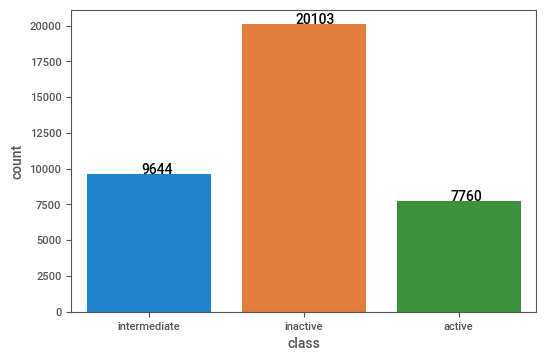

In [ ]:
sample_plot = sns.countplot(df5['class'])
#This display the values on top of the bars
for p in sample_plot.patches:
        sample_plot.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+20))

In [ ]:
print(df5.isnull().sum())

molecule_chembl_id    5205
canonical_smiles      5205
standard_value        5205
class                 5205
dtype: int64


In [ ]:
df6 = df5.dropna()

In [ ]:
print(df6.isnull().sum())

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
class                 0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


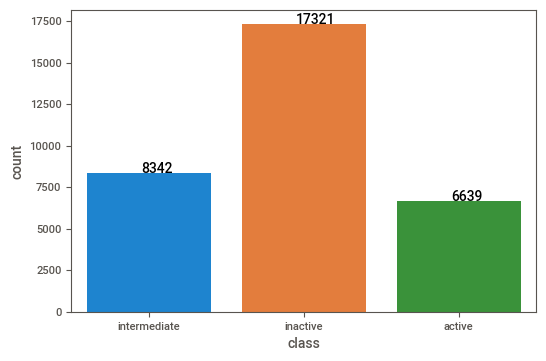

In [ ]:
sample_plot = sns.countplot(df6['class'])
#This display the values on top of the bars
for p in sample_plot.patches:
        sample_plot.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+25))

# Saves dataframe to CSV file

In [ ]:
df.shape,df6.shape

((43951, 45), (32302, 4))

In [ ]:
df6.to_csv('1.data_preparation.csv')
!cp 1.data_preparation.csv "/content/drive/MyDrive/Colab Notebooks/drug discovery/MCF7/data"